#### Closing Stock Prediction in TESLA Dataset (from kaggle)
Tesla stock data from 2010 to 2020

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

Read data

In [4]:
data = pd.read_csv('TSLA.csv')

Take a look of data

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [43]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [7]:
data.shape

(2416, 7)

Checking Data type

In [9]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Data correlation

Open, High, Low, Close & Adj Close are high correlated

In [12]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


Checking if there is any missing value

In [14]:
data.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

We see that Date Column is object type.
We change it to date type and set it as index column of the dataset

In [16]:
data['Date'] = pd.to_datetime(data['Date'])

In [17]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [18]:
data = data.set_index('Date')

In [19]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Plot the "Close" values during the years

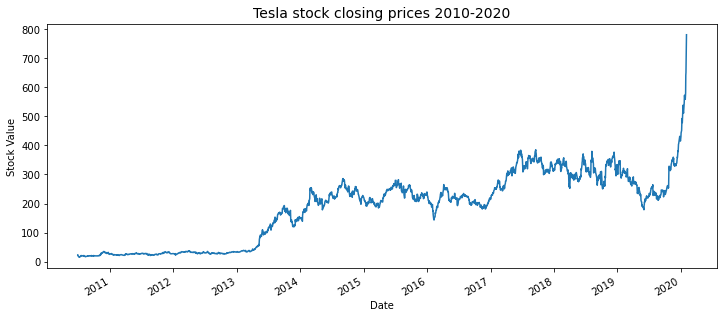

In [49]:
plt.figure(figsize=(12,5))
plt.title('Tesla stock closing prices 2010-2020', fontsize=14)
data['Close'].plot()
plt.xlabel("Date")
plt.ylabel("Stock Value")

plt.show()

Our data are ready to fit in ML model

Define target ('Close')

In [24]:
X = data.drop(['Close','Adj Close'],axis=1)
y = data['Close']

split into train & test sets<br>
Using 70% train 30% test

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Creating the model <br>
fiting the model

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")


coefficient of determination: 0.9997095749905018


making predictions

In [31]:
pred = model.predict(X_test)

In [32]:
comparison = pd.DataFrame(
    {'Predicted Values':pred,'Actual Values':y_test})

In [33]:
comparison.shape

(725, 2)

In [34]:
comparison.reset_index(inplace=True)

In [35]:
comparison = comparison.sort_values(by='Date')
comparison.reset_index(drop=True, inplace=True)
comparison = comparison.set_index('Date')
comparison

,Predicted Values,Actual Values
Date,,
2010-06-30,27.768443,23.830000
2010-07-01,22.104218,21.959999
2010-07-12,17.272295,17.049999
2010-07-13,18.071229,18.139999
2010-07-16,20.669618,20.639999
...,...,...
2020-01-21,544.362468,547.200012
2020-01-22,581.389294,569.559998
2020-01-24,560.215302,564.820007


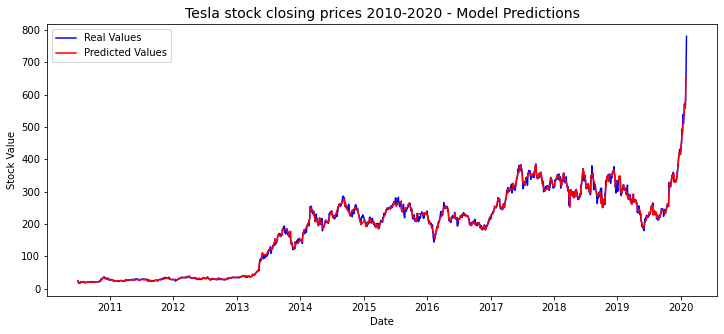

In [45]:
plt.figure(figsize=(12,5))
plt.title('Tesla stock closing prices 2010-2020 - Model Predictions', fontsize=14)
plt.plot(data['Close'],color="blue",label="Real Values")
plt.plot(comparison['Actual Values'],color="red",label="Predicted Values")
plt.xlabel("Date")
plt.ylabel("Stock Value")
plt.legend()
plt.show()